
# 🧪 Solute Transport Across Tissue Barriers

This exercise explores how solutes move across tissue barriers through diffusion and convection. You'll simulate different physiological conditions and analyze the resulting flux and concentration profiles.

---

## 🎯 Learning Objectives
- Understand diffusive and convective flux.
- Explore physiological impacts on solute transport.
- Implement and interpret the Peclet number.
- Practice writing scientific notes.



## 📚 Background & Theory

Solute transport is governed by:
- **Diffusion**: driven by concentration gradients.
- **Convection**: driven by fluid flow.

Total flux:
$$
J_s = -D 
rac{dC}{dx} + vC
$$

Peclet number:
$$
	ext{Pe} = 
rac{vx}{D}
$$

Log-scale Peclet helps visualize dominance of diffusion vs. convection.


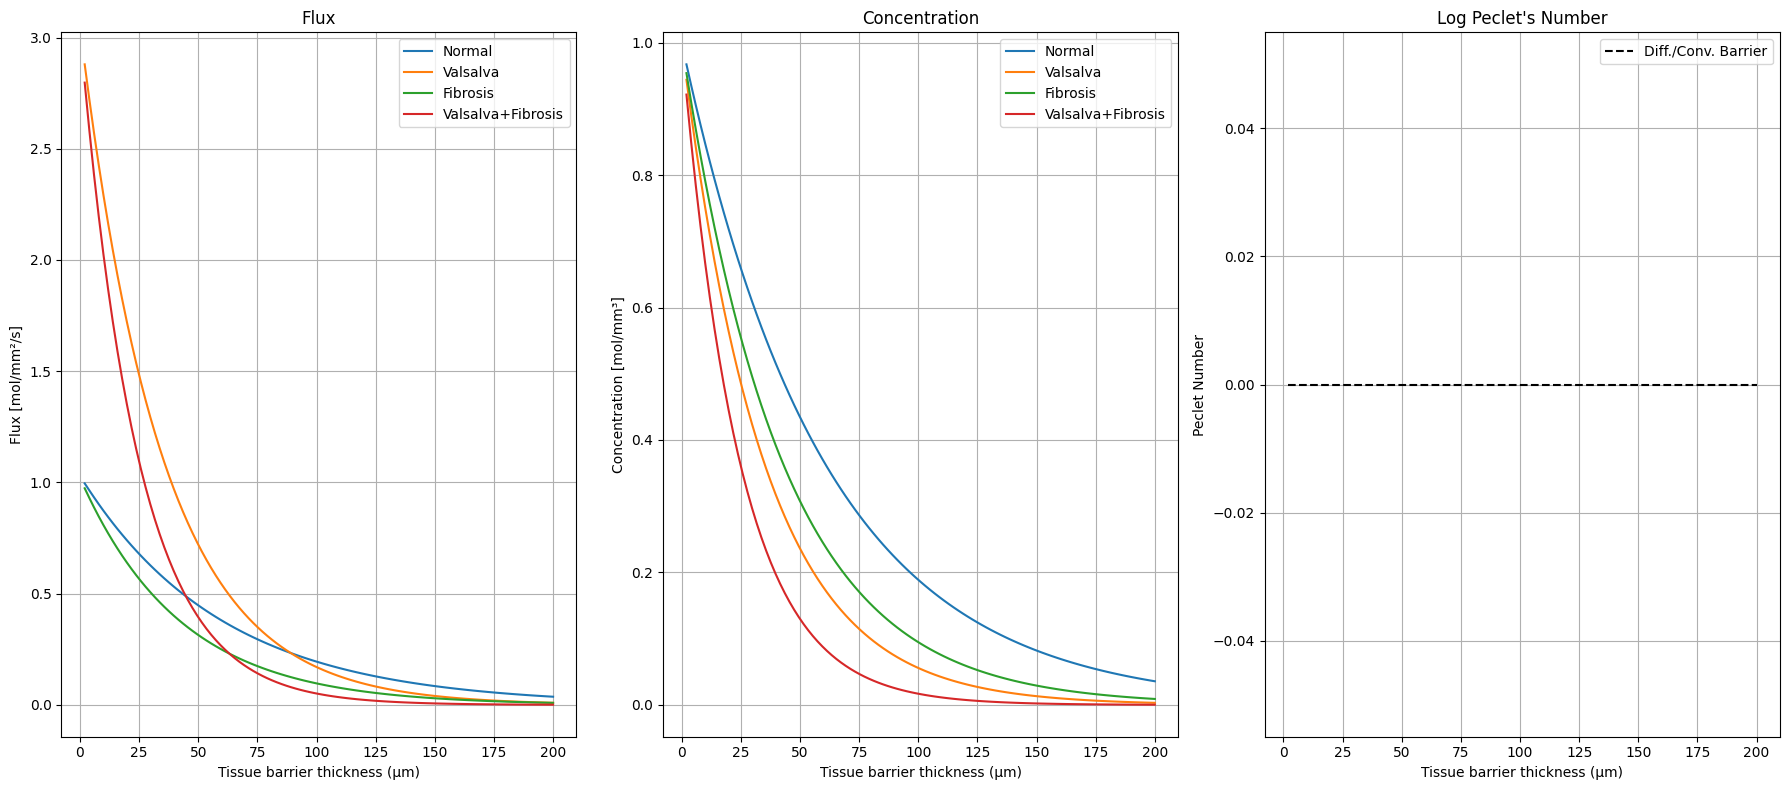

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes


def concentration(x, L_axial, v, D, C0):
    transit_time = L_axial / v
    lambda_eff = np.sqrt(2 * D * transit_time)
    C = C0 * np.exp(-x / lambda_eff)
    return C


def flux(
    x: np.ndarray,
    C: np.ndarray,
    v: float,
    D: float,
):
    dCdx = np.gradient(C, x)
    Jd = -D * dCdx
    Jc = v * C
    Js = Jd + Jc

    return Js


def log_peclet(x, D, v):
    Pe = np.log10(x * v / D)
    return Pe


if __name__ == "__main__":
    import matplotlib.pyplot as plt

    L_axial = 1  # mm
    L = 0.2  # mm
    C0 = 1.0  # mol/mm^3
    x = np.linspace(0.01 * L, L, 101)  # mm

    conditions = {
        "Normal": {"v": 1, "D": 1.8e-3},
        "Valsalva": {"v": 3, "D": 1.8e-3},  # Increased velocity
        "Fibrosis": {"v": 1, "D": 0.9e-3},  # Reduced diffusion
        "Valsalva+Fibrosis": {
            "v": 3,
            "D": 0.9e-3,
        },  # Increased velocity, Reduced diffusion
    }
    # Create subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 8))
    axs: list[matplotlib.axes.Axes]

    for i, (label, params) in enumerate(conditions.items()):
        v = params["v"]
        D = params["D"]

        # Flux components
        C = concentration(x, L_axial, v, D, C0)
        Js = flux(x, C, v, D)
        Pe = log_peclet(x, D, v)

        # Plot fluxes
        axs[0].plot(x * 1e3, Js, label=label)
        axs[0].set_title("Flux")
        axs[0].set_xlabel("Tissue barrier thickness (μm)")
        axs[0].set_ylabel("Flux [mol/mm²/s]")
        axs[0].grid(True)
        axs[0].legend()

        # Plot concentration
        axs[1].plot(x * 1e3, C, label=label)
        axs[1].set_title("Concentration")
        axs[1].set_xlabel("Tissue barrier thickness (μm)")
        axs[1].set_ylabel("Concentration [mol/mm³]")
        axs[1].grid(True)
        axs[1].legend()

        # Plot peclet
        if i == 0:
            axs[2].plot(
                x * 1e3,
                np.zeros_like(x),
                label="Diff./Conv. Barrier",
                linestyle="--",
                color="k",
            )

        axs[2].set_title("Log Peclet's Number")
        axs[2].set_xlabel("Tissue barrier thickness (μm)")
        axs[2].set_ylabel("Peclet Number")
        axs[2].grid(True)
        axs[2].legend()

    plt.tight_layout()
    plt.show()



## 🧭 Part 1: Basic Simulation

Run the model with the **Normal** condition only.

### ✍️ Tasks:
1. Plot concentration and flux.
2. Leave log-Peclet blank for now.
3. Write a short note explaining:
   - How concentration changes across the tissue.
   - What drives the flux in this case.

### 📓 Your Notes:
_Use the cell below to write your explanation._



### ✏️ Student Notes

_Explain the behavior of concentration and flux in the Normal condition._



## 🧭 Part 2: Add Physiological Scenarios

Extend the model to include:
- **Valsalva**: increased velocity
- **Fibrosis**: reduced diffusion
- **Valsalva + Fibrosis**: both changes

### ✍️ Tasks:
1. Plot all conditions.
2. Compare how each affects concentration and flux.
3. Identify which condition shows strongest convection.

### 📓 Your Notes:
_Use the cell below to write your analysis._



### ✏️ Student Notes

_Compare the effects of different physiological conditions._



## 🧭 Part 3: Implement Log-Peclet Number

Now implement the `log_peclet(x, D, v)` function:
```python
def log_peclet(x, D, v):
    Pe = np.log10(x * v / D)
    return Pe
```

### ✍️ Tasks:
1. Add log-Peclet plots for each condition.
2. Identify regions where:
   - Diffusion dominates (Pe < 0)
   - Convection dominates (Pe > 0)
3. Write a short note explaining the significance.

### 📓 Your Notes:
_Use the cell below to write your explanation._



### ✏️ Student Notes

_Explain the significance of the Peclet number in tissue transport._
